<a href="https://oilprice.com/"><img src = "../images/brent.jpg" width = 400, align = "center"></a>
# <center>OIL PRICES OF MAJOR CRUDE OIL BENCHMARK(2003 - 2020)</center>

#### About this Notebook
In this notebook, we would use web scrapping technique to extarct the prices of the top three crude oil benchamerks from 2003 till 2020 for in the world. The data is scrapped from different sources including:
1. [WIKIPEDIA source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
2. [OPEC source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
3. [Other source]()
4. [CBN source](https://www.cbn.gov.ng/rates/crudeoil.asp)
5. [Quandl sources](https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv)

The dataset is  then cleaned, presented in various visualisation patterns using different visualisation libraries and tools before exporting into a readable format for references (which can be used to build simple-regression or multi-regression models using machine learning techniques).

### TASK(S)
1. EXTRACT THE PRIMARY SELLING PRICE **BRENT CRUDE** FOR THE PERIOD (2000 -  2020)
2. EXTARCT THE PRIMARY SELLING PRICE  **WESTERN TEXAS INTERMIDATE [WTI]**  FOR THE PERIOD (2000 – 2020)
3. EXTARCT THE PRIMARY SELLING PRICE FOR **BONNY LIGHT** FOR THE PERIOD (2000 -  2020)
4. COMBINE THEM FIGURES INTO A **READBLE FORMAT**

### Import dependencies

In [49]:
%matplotlib inline
from datetime import datetime, timedelta
import itertools # 
import matplotlib as mpl #
import matplotlib.pyplot as plt #
import matplotlib.dates as mpl_dates
import numpy as np # imports numpy library
import pandas as pd #imports pandas library
import json # imports json library

### Import general price dataset

In [4]:
# General Price of crude from 2003 - 2020
opec_price_df = pd.read_csv('https://www.quandl.com/api/v3/datasets/OPEC/ORB.csv')
opec_price_df.tail(5)

,Date,Value
4665,2003-01-08,28.86
4666,2003-01-07,29.72
4667,2003-01-06,30.71
4668,2003-01-03,30.83
4669,2003-01-02,30.05


In [5]:
#since we notice it is displaying from the most recent to the former
#let reverse the order of the dataframe (opec_price_df)
rev_opec_price_df=opec_price_df.reindex(index=opec_price_df.index[::-1])
rev_opec_price_df

#then reorder the dataframe
rev_opec_price_df = rev_opec_price_df.reset_index(drop=True)
rev_opec_price_df

,Date,Value
0,2003-01-02,30.05
1,2003-01-03,30.83
2,2003-01-06,30.71
3,2003-01-07,29.72
4,2003-01-08,28.86
...,...,...
4665,2021-02-03,57.72
4666,2021-02-04,58.25
4667,2021-02-05,58.92
4668,2021-02-08,59.58


In [6]:
#rename the column of the dataframe of the (rev_opec_price_df)
rev_opec_price_df = rev_opec_price_df.rename(columns={"Date": "Date(YY/MM/DD)", "Value":"Price($)"} )
rev_opec_price_df.head(2)

,Date(YY/MM/DD),Price($)
0,2003-01-02,30.05
1,2003-01-03,30.83


### Import brent crude price (daily, weekly, monthly, yearly)

In [8]:
#Import the price of Brent from 2003 -2020
brent_price_daily_df = pd.read_csv(r"./data/brent-daily.csv")
brent_price_weekly_df = pd.read_csv(r"./data/brent-weekly.csv")
brent_price_monthly_df = pd.read_csv(r"./data/brent-monthly.csv")
brent_price_yearly_df = pd.read_csv(r"./data/brent-year.csv")

In [9]:
#display the heading of the record 
brent_price_daily_df.head(2)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45


In [10]:
#display the heading of the record 
brent_price_weekly_df.head(2)

,Date,Price
0,1987-05-15,18.58
1,1987-05-22,18.54


In [11]:
#display the heading of the record  
brent_price_monthly_df.head(2)

,Date,Price
0,1987-05-15,18.58
1,1987-06-15,18.86


In [12]:
#display the heading of the record
brent_price_yearly_df.head(2)

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91


In [13]:
# Rename Columns for each of the brent Price records
brent_price_daily_df2=brent_price_daily_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
brent_price_weekly_df2=brent_price_weekly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
brent_price_monthly_df2=brent_price_monthly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})
brent_price_yearly_df2=brent_price_yearly_df.rename(columns={"Date": "Date(YY/MM/DD)", "Price":"Price($)"})

#print out the abridge dataframe
print(brent_price_daily_df2)
print(brent_price_weekly_df2)
print(brent_price_monthly_df2)
print(brent_price_yearly_df2)

     Date(YY/MM/DD)  Price($)
0        1987-05-20     18.63
1        1987-05-21     18.45
2        1987-05-22     18.55
3        1987-05-25     18.60
4        1987-05-26     18.63
...             ...       ...
8552     2021-01-26     55.26
8553     2021-01-27     55.07
8554     2021-01-28     54.87
8555     2021-01-29     55.25
8556     2021-02-01     56.42

[8557 rows x 2 columns]
     Date(YY/MM/DD)  Price($)
0        1987-05-15     18.58
1        1987-05-22     18.54
2        1987-05-29     18.60
3        1987-06-05     18.70
4        1987-06-12     18.75
...             ...       ...
1755     2021-01-01     50.82
1756     2021-01-08     53.31
1757     2021-01-15     55.38
1758     2021-01-22     55.23
1759     2021-01-29     55.18

[1760 rows x 2 columns]
    Date(YY/MM/DD)  Price($)
0       1987-05-15     18.58
1       1987-06-15     18.86
2       1987-07-15     19.86
3       1987-08-15     18.98
4       1987-09-15     18.31
..             ...       ...
400     2020-09-15     40.9

### Visualisation Summary

#### Plots of Daily Price of Brent Oil

In [38]:
# data type of daily brent
print(brent_price_daily_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [55]:
# convert the date column to a usuable format in pandas

brent_price_daily_df2['Date(YY/MM/DD)'] =pd.to_datetime(brent_price_daily_df2['Date(YY/MM/DD)'])
brent_price_daily_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x=brent_price_daily_df2['Date(YY/MM/DD)']
y=brent_price_daily_df2['Price($)']

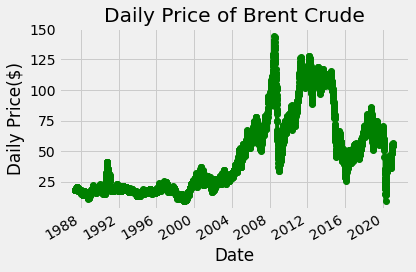

<Figure size 720x1080 with 0 Axes>

In [58]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x, y, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily.png')
plt.show()

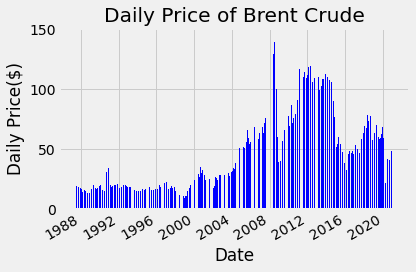

<Figure size 720x1080 with 0 Axes>

In [59]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-2.png')
plt.show()

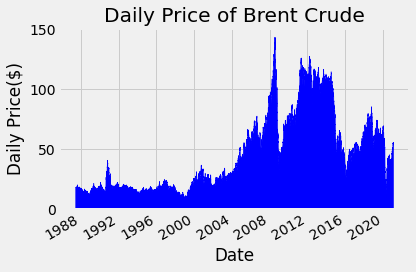

<Figure size 720x1080 with 0 Axes>

In [60]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x, y, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Daily Price($)')
plt.title('Daily Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-3.png')
plt.show()

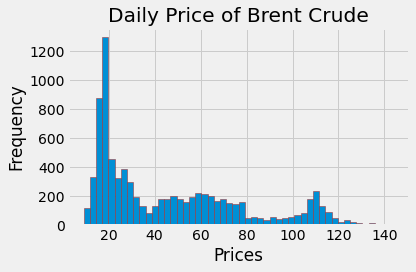

<Figure size 720x1080 with 0 Axes>

In [64]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Daily Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-4.png')
plt.show()

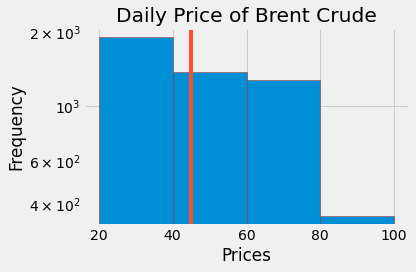

<Figure size 720x1080 with 0 Axes>

In [67]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=45
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Daily Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-5.png')
plt.show()

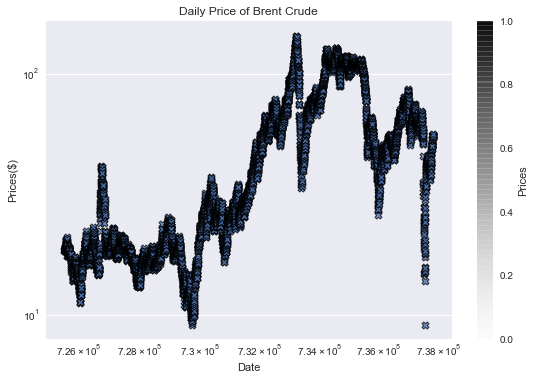

<Figure size 720x1080 with 0 Axes>

In [98]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x, y, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Daily Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_daily-6.png')
plt.show()

#### Plot of Weekly Price of Brent Oil

In [39]:
# data type of weekly brent
print(brent_price_weekly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [83]:
# convert the date column to a usuable format in pandas

brent_price_weekly_df2['Date(YY/MM/DD)'] =pd.to_datetime(brent_price_weekly_df2['Date(YY/MM/DD)'])
brent_price_weekly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_week=brent_price_weekly_df2['Date(YY/MM/DD)']
y_week=brent_price_weekly_df2['Price($)']

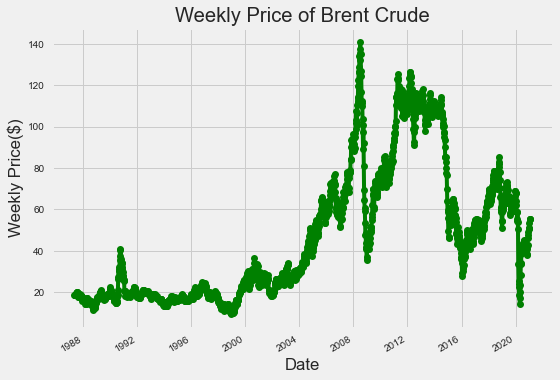

<Figure size 720x1080 with 0 Axes>

In [84]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_week, y_week, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekly Price($)')
plt.title('Weekly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly.png')
plt.show()

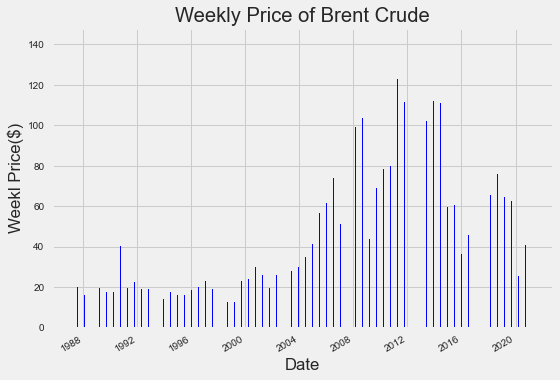

<Figure size 720x1080 with 0 Axes>

In [85]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_week, y_week, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekl Price($)')
plt.title('Weekly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-2.png')
plt.show()

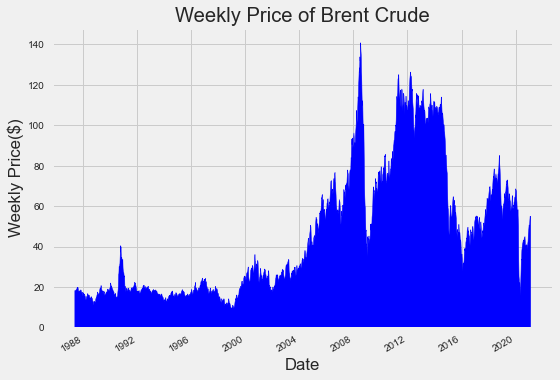

<Figure size 720x1080 with 0 Axes>

In [87]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_week, y_week, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Weekly Price($)')
plt.title('Weekly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-3.png')
plt.show()

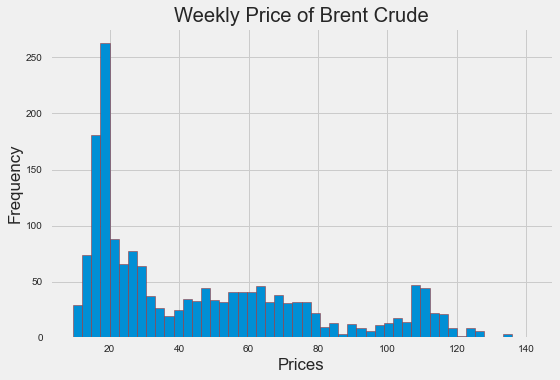

<Figure size 720x1080 with 0 Axes>

In [88]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_week, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Weekly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-4.png')
plt.show()

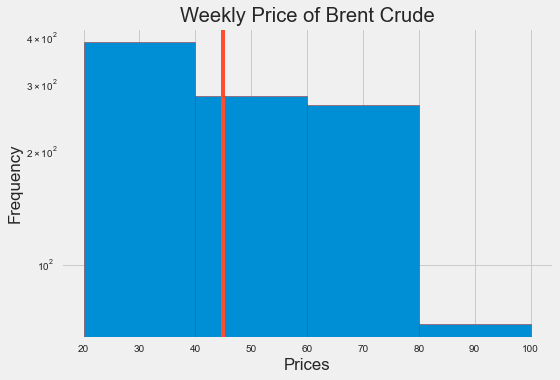

<Figure size 720x1080 with 0 Axes>

In [89]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_week, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=45
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Weekly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-5.png')
plt.show()

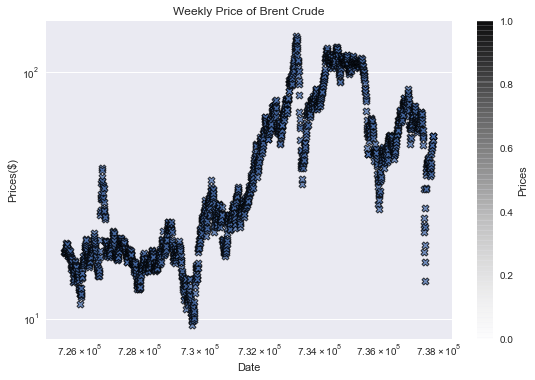

<Figure size 720x1080 with 0 Axes>

In [97]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_week, y_week, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Weekly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_weekly-6.png')
plt.show()

#### Monthly Price of Brent Oil

In [42]:
# data type monthly brent
print(brent_price_monthly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [91]:
# convert the date column to a usuable format in pandas

brent_price_monthly_df2['Date(YY/MM/DD)'] =pd.to_datetime(brent_price_monthly_df2['Date(YY/MM/DD)'])
brent_price_monthly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_month=brent_price_monthly_df2['Date(YY/MM/DD)']
y_month=brent_price_monthly_df2['Price($)']

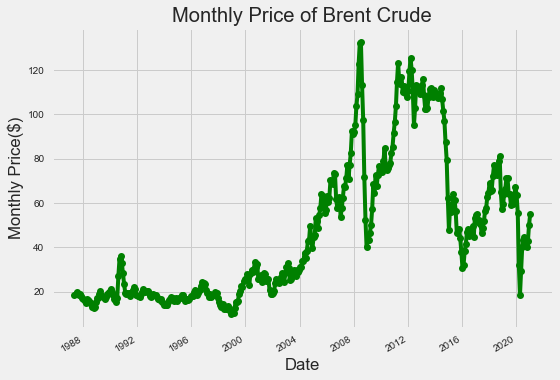

<Figure size 720x1080 with 0 Axes>

In [92]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_month, y_month, color='g', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly.png')
plt.show()

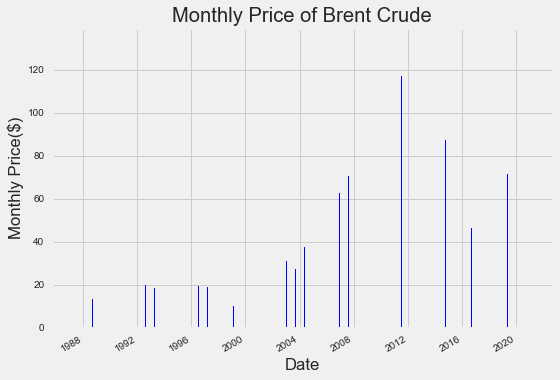

<Figure size 720x1080 with 0 Axes>

In [93]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_month, y_month, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly-2.png')
plt.show()

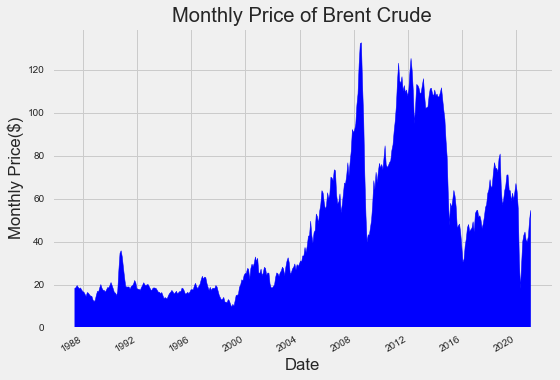

<Figure size 720x1080 with 0 Axes>

In [94]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_month, y_month, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Monthly Price($)')
plt.title('Monthly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly-3.png')
plt.show()

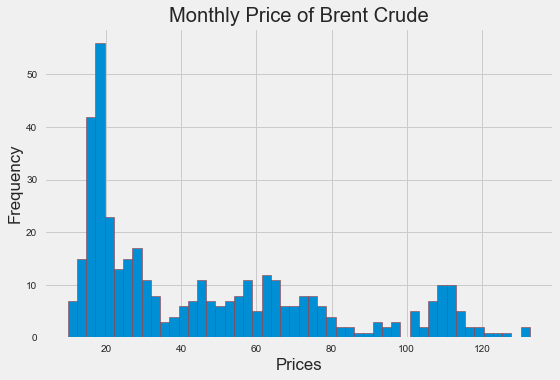

<Figure size 720x1080 with 0 Axes>

In [95]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_month, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly-4.png')
plt.show()

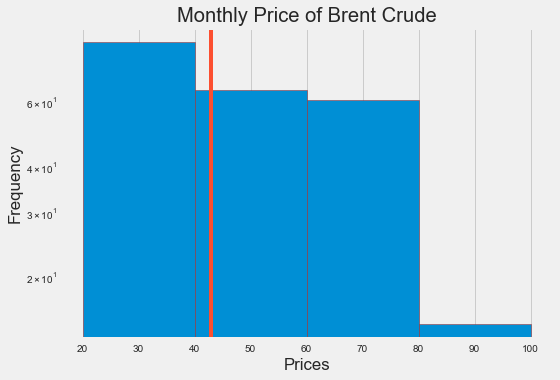

<Figure size 720x1080 with 0 Axes>

In [96]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_month, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=43
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly-5.png')
plt.show()

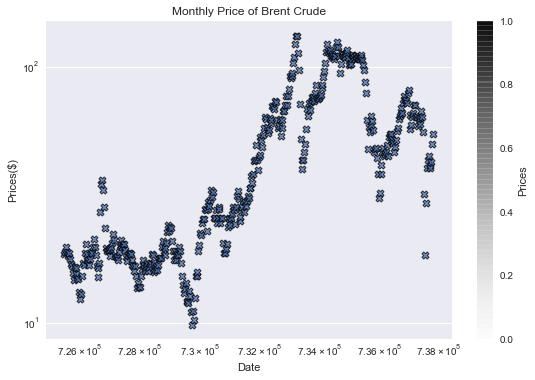

<Figure size 720x1080 with 0 Axes>

In [99]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_month, y_month, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Monthly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_monthly-6.png')
plt.show()

#### Yearly Price of Brent Oil

In [43]:
# data type of daily brent
print(brent_price_yearly_df2.dtypes)

Date(YY/MM/DD)     object
Price($)          float64
dtype: object


In [101]:
# convert the date column to a usuable format in pandas

brent_price_yearly_df2['Date(YY/MM/DD)'] =pd.to_datetime(brent_price_yearly_df2['Date(YY/MM/DD)'])
brent_price_yearly_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the values to be plotted
x_year=brent_price_yearly_df2['Date(YY/MM/DD)']
y_year=brent_price_yearly_df2['Price($)']

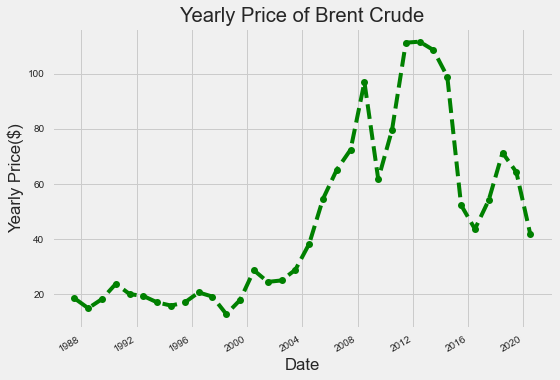

<Figure size 720x1080 with 0 Axes>

In [103]:
# Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x_year, y_year, color='g', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly.png')
plt.show()

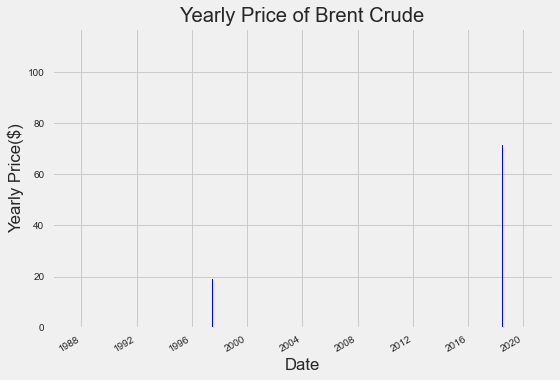

<Figure size 720x1080 with 0 Axes>

In [104]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x_year, y_year, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly-2.png')
plt.show()

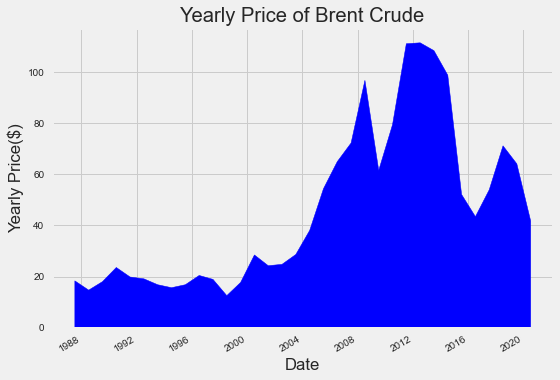

<Figure size 720x1080 with 0 Axes>

In [105]:
# Area Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x_year, y_year, color='b', linestyle='solid')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Price of Brent Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly-3.png')
plt.show()

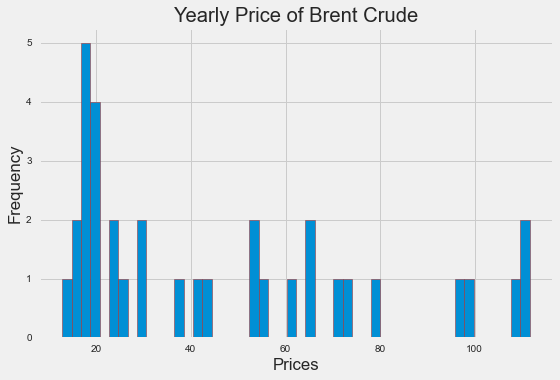

<Figure size 720x1080 with 0 Axes>

In [106]:
# Histogram Plot with no specified bins
plt.style.use('fivethirtyeight')
plt.hist(y_year, bins= 50, edgecolor='brown', linestyle='solid')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Yearly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly-4.png')
plt.show()

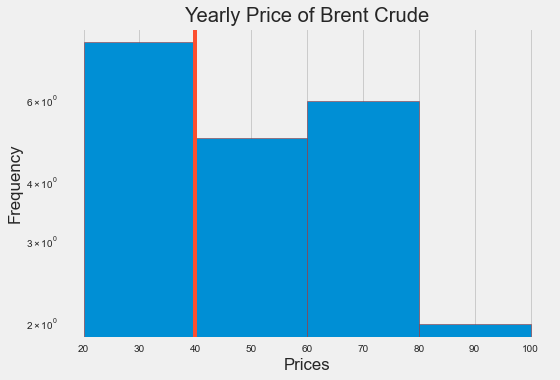

<Figure size 720x1080 with 0 Axes>

In [107]:
# Histogram Plot with  specified bins
plt.style.use('fivethirtyeight')
bins=[20, 40, 60, 80, 100 ]
plt.hist(y_year, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=40
color="#fc4f30"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Yearly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly-5.png')
plt.show()

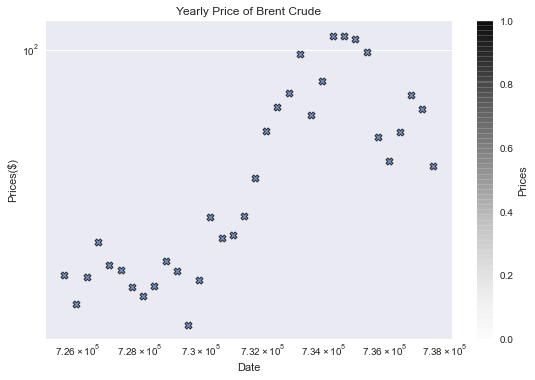

<Figure size 720x1080 with 0 Axes>

In [108]:
# Scatter Plot
plt.style.use('seaborn')
plt.scatter(x_year, y_year, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Prices')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prices($)')
plt.title('Yearly Price of Brent Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig('./images/brent_yearly-6.png')
plt.show()

### Combined Plot for Brent Oil Price

Text(0.5, 1.0, 'Yearly-Price')

<Figure size 1440x720 with 0 Axes>

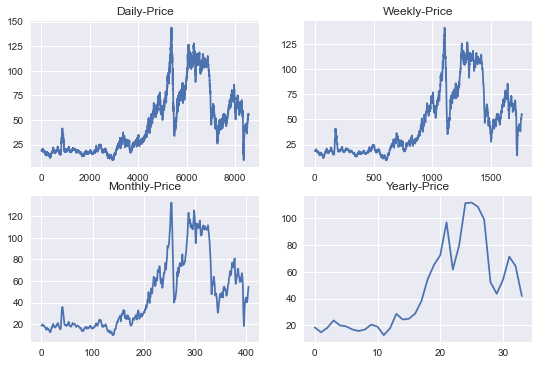

In [82]:
# Plot the prices of brent crude for all (daily, weekly, monthly, yearly)
plt.figure(figsize=(20,10))
fig, axes = plt.subplots(nrows=2, ncols=2)

brent_price_daily_df2['Price($)'].plot(ax=axes[0,0]); axes[0,0].set_title('Daily-Price')

brent_price_weekly_df2['Price($)'].plot(ax=axes[0,1]); axes[0,1].set_title('Weekly-Price')

brent_price_monthly_df2['Price($)'].plot(ax=axes[1,0]); axes[1,0].set_title('Monthly-Price')

brent_price_yearly_df2['Price($)'].plot(ax=axes[1,1]); axes[1,1].set_title('Yearly-Price')

plt.figsave(./data/brent-combined-price.png)
plt.show()

### Mathematical Operations

In [109]:
# describe the daily dataset
brent_price_daily_df2.describe()

,Price($)
count,8557.000000
mean,46.351769
std,32.159404
min,9.100000
25%,18.850000
50%,33.260000
75%,66.150000
max,143.950000


In [110]:
# describe the weekly dataset
brent_price_weekly_df2.describe()

,Price($)
count,1760.000000
mean,46.433045
std,32.278526
min,9.440000
25%,18.810000
50%,33.290000
75%,66.512500
max,141.070000


In [111]:
# describe the monthly dataset
brent_price_monthly_df2.describe()

,Price($)
count,405.000000
mean,46.407210
std,32.242838
min,9.820000
25%,18.790000
50%,32.770000
75%,66.020000
max,132.720000


In [112]:
# describe the yearly dataset
brent_price_yearly_df2.describe()

,Price($)
count,34.000000
mean,46.143529
std,31.758593
min,12.760000
25%,19.162500
50%,33.555000
75%,64.945000
max,111.630000


In [128]:
# Mean of Daily Price of Brent Crude
brent_price_daily_df2["Price($)"].mean()

46.351769311674595

In [129]:
# Mean of Weekly Price of Brent
brent_price_weekly_df2["Price($)"].mean()

46.43304545454542

In [130]:
# Mean of Monthly Price of Brent
brent_price_monthly_df2["Price($)"].mean()

46.407209876543234

In [131]:
# Mean of yealry Price of Brent
brent_price_yearly_df2["Price($)"].mean()

46.14352941176471

In [142]:
# Max and Min Value of Daily Brent 
max_daily = brent_price_daily_df2["Price($)"].max()
print(max_daily)

min_daily = brent_price_daily_df2["Price($)"].min()
print(min_daily)

143.95
9.1


In [143]:
# Max and Min Value of Weekly Brent 
max_weekly = brent_price_weekly_df2["Price($)"].max()
print(max_weekly)

min_weekly = brent_price_weekly_df2["Price($)"].min()
print(min_weekly)

141.07
9.44


In [144]:
# Max and Min Value of Monthly Brent 
max_monthly= brent_price_monthly_df2["Price($)"].max()
print(max_monthly)

min_monthly = brent_price_monthly_df2["Price($)"].min()
print(min_monthly)

132.72
9.82


In [145]:
# Max and Min Value of Daily Brent 
max_yearly = brent_price_yearly_df2["Price($)"].max()
print(max_yearly)

min_yearly = brent_price_yearly_df2["Price($)"].min()
print(min_yearly)

111.63
12.76


### Inferences and Recommendation

[Click here to read from this file]('https://wwww.google.drive)

### Created by **@chisomloius**